# CNN(Convolution Neural Network)
---
- 이미지, 영상 처리에 사용되는 신경망 모델
- DNN의 한 분야
- 텍스트 처리에도 사용되는 모델
- 사용되는 Layer
    * ConvXD : 이미지의 형태 그대로 입력 받아 특징을 추출하는 레이어
    * Pooling : 특징맵에서 특징을 다시 추출, 다운샘플링하는 레이어, 크기 반으로 줄임

In [121]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# W, b 고정하도록 seed 설정
set_random_seed(11)

## [1] 데이터 준비 및 로딩
---

In [123]:
(x_train, y_train), (x_test, y_test) = load_data()

In [124]:
print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}, y_test.shape : {y_test.shape}')

x_train.shape : (60000, 28, 28), y_train.shape : (60000,)
x_test.shape : (10000, 28, 28), y_test.shape : (10000,)


## [2] 데이터 전처리 및 학습형태로 변환

In [125]:
# 스케일링 => 픽셀 / 255.0
x_train = x_train/255.0
x_test = x_test/255.0

In [126]:
# Conv 레이어는 이미지 채널 정보까지 입력
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [127]:
print(f'x_train.shape : {x_train.shape}, x_test.shape : {x_test.shape}')

x_train.shape : (60000, 28, 28, 1), x_test.shape : (10000, 28, 28, 1)


In [128]:
# 데이터셋에 노이즈 추가
# np.random.normal(평균loc=0.0, 표준편차scale=1.0, 출력size=None)
x_train_noised = x_train + np.random.normal(0, 0.5, size=x_train.shape)
x_test_noised = x_test + np.random.normal(0, 0.5, size=x_test.shape)

# 픽셀 범위 0.0~1.0 벗어나는 픽셀값 조정 np.clip(array, min, max)
x_train_noised = np.clip(x_train_noised, a_min=0, a_max=1)
x_test_noised = np.clip(x_test_noised, a_min=0, a_max=1)

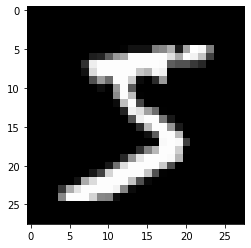

In [129]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()

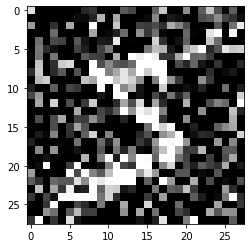

In [130]:
plt.imshow(x_train_noised[0].reshape(28,28), cmap='gray')
plt.show()

## [3] 모델 구성 및 생성
---
- 입력 형태 : 채널정보까지 포함 3차원 (28, 28, 1)
- 출력 형태 : 0 ~ 9 정수 확률값 10개 출력
- 학습 방식 : 분류 - 이진분류
- 전반부
    * 이미지 특징 추출
        - Conv2D
- 후반부
    * 이미지 데이터 학습
        - Conv2D

### [3-1] 모델 구상 및 생성
---
- compile 메서드
    * loss 손실 함수 => binary_crossentropy
    * optimizer 최적화 방식 => adam

In [131]:
def createCNNModel(kernel):
    model=Sequential()
    # 이미지 특징 추출 Layer => 첫번째 입력값 설정
    model.add(Conv2D(kernel, kernel_size=3, padding='same', input_shape=(28,28,1)))
    # 출력
    model.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam')
    return model

In [132]:
oneModel=createCNNModel(1)
tenModel=createCNNModel(10)
fiftyModel=createCNNModel(50)

In [133]:
oneModel.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 1)         10        
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 1)         10        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


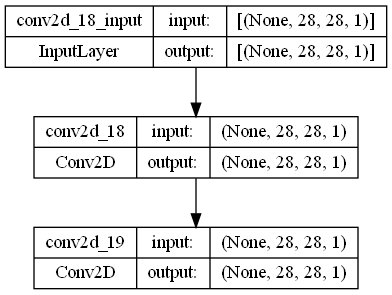

In [134]:
plot_model(oneModel, show_shapes=True)

### [3-2] 모델 학습
---
- fit 메서드
    * 학습 데이터, 라벨
    * epochs 학습횟수
    * batch_size 학습분량
    * validation_data (검증데이터, 검증라벨)
    * validation_split 학습데이터의 일부 비율 설정 (예:0.2)
    * callback
    * verbose : 학습 진행도 화면 출력 여부 설정

In [135]:
oneModel.fit(x_train_noised, x_train, epochs=10)
tenModel.fit(x_train_noised, x_train, epochs=10)
fiftyModel.fit(x_train_noised, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.2589
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1226
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1217
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1210
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1207
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1205
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1204
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1204
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1203
Epoch 10/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1203
Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1574
Epoch 2/10
1875/1875 [==============================] - 45s 24ms

In [136]:
x_train_noised.shape

(60000, 28, 28, 1)

## [4] 평가
---
- evaluate 메서드
- 테스트 데이터, 테스트 라벨

In [137]:
oneModel.evaluate(x_test, x_test)
tenModel.evaluate(x_test, x_test)
fiftyModel.evaluate(x_test, x_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.0802


0.08023415505886078

## [5] 예측 
---
- 새로운 데이터 사용

In [138]:
x_test_noised[0].shape

(28, 28, 1)

In [139]:
pre_out1=oneModel.predict(x_test_noised[0])
pre_out10=tenModel.predict(x_test_noised[0])
pre_out50=fiftyModel.predict(x_test_noised[0])

1/1 [==============================] - 0s 251ms/step


In [140]:
x_test[0].shape

(28, 28, 1)

### 원본 이미지 - AE 진행된 이미지 비교

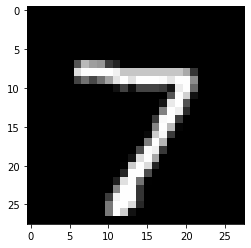

In [141]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.show()
# x_test[0].shape

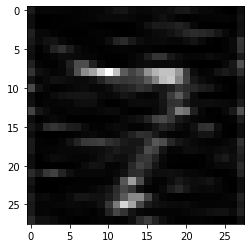

In [142]:
plt.imshow(pre_out1.reshape(28,28), cmap='gray')
plt.show()

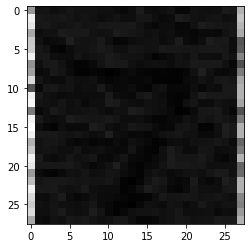

In [143]:
plt.imshow(pre_out10.reshape(28,28), cmap='gray')
plt.show()

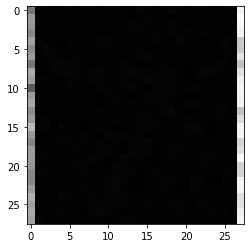

In [144]:
plt.imshow(pre_out50.reshape(28,28), cmap='gray')
plt.show()